# Importing Libraries


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
import alpaca_trade_api as tradeapi
from alpaca_trade_api import TimeFrame, TimeFrameUnit


# Reading The Data

In [26]:
SEC_KEY = 'oR10Q75WdU32qnCjB6YrAWXZsb9K4I7bytCjVWwO'
PUB_KEY ='PKOLT5ME37ZTLIKDHQTK'
BASE_URL ='https://paper-api.alpaca.markets'
symb = "TSLA"
api = tradeapi.REST(key_id= PUB_KEY, secret_key=SEC_KEY, base_url=BASE_URL) # For real trading, don't enter a base_url
df = api.get_barset(symb, TimeFrame(15, TimeFrameUnit.Minute), limit=300).df  # Get one bar object for each of the past 5 minutes
df=df[symb]
df['Close']=df['close']
df['High']=df['high']
df['Low']=df['low']
df['Open']=df['open']
df['Volume']=df['volume']
plt.figure(figsize=(18,7))
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.plot(df['Close'] )
plt.title(symb,size=42)
plt.grid()
plt.show()

# RSI Indicator Visualizastion

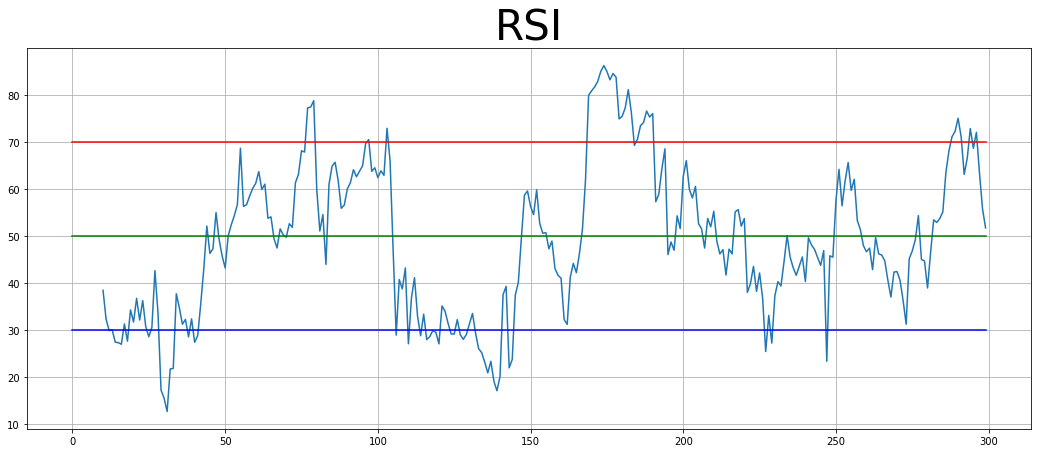

In [ ]:
df['rsi'] = ta.RSI(df['Close'], timeperiod=10)
df['rsi at 70'] = 70
df['rsi at 30'] = 30
df['rsi at 50'] = 50
plt.figure(figsize=(18,7))
plt.plot(df['rsi'] )
plt.plot(df['rsi at 70'],color='r')
plt.plot(df['rsi at 30'],color='b')
plt.plot(df['rsi at 50'],color='g')
plt.title('RSI',size=42)
plt.grid()
plt.show()

# Empty Arrays

In [ ]:

buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None

# Decision Making Process


Profit = 5
Stop_loss = 7
PROFITIBLITY 41.66666666666667


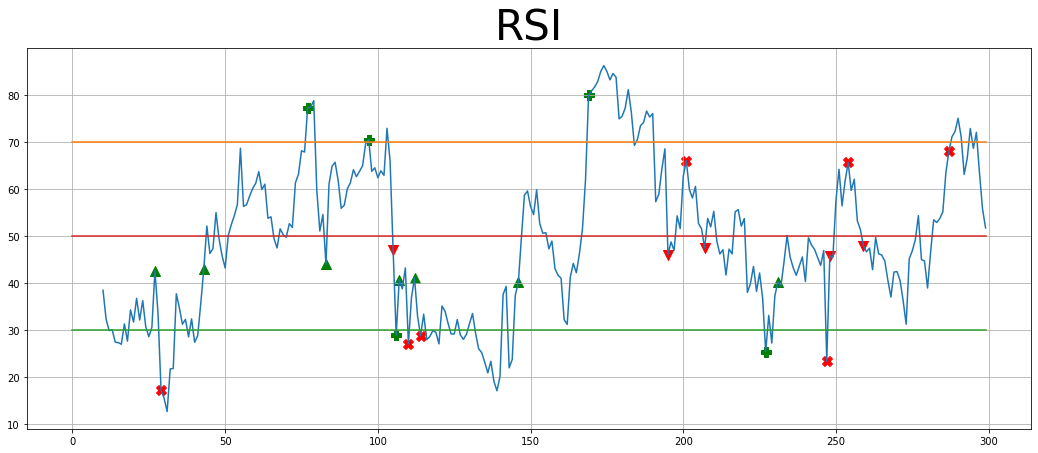

In [ ]:

for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['rsi'][i]<45 and df['rsi'][i]>=40 and position_Buy!="Buy" and position_Sell!="Sell"  :
        buy.append(df['rsi'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['rsi'][i]<=50 and df['rsi'][i]>45 and position_Sell!="Sell" and position_Buy!="Buy" :
        sell.append(df['rsi'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_rsi#######################################################
    elif position_Buy=="Buy":
        if df['rsi'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['rsi'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['rsi'][i]<=30 :
            Stop_loss.append(df['rsi'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_rsi#######################################################
    elif position_Sell=="Sell":
        if df['rsi'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['rsi'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['rsi'][i]>=65:
            Stop_loss.append(df['rsi'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['rsi'])
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100)
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100)
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100)
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100)
plt.plot(df['rsi at 70'])
plt.plot(df['rsi at 30'])
plt.plot(df['rsi at 50'])
plt.title('RSI',size=42)

plt.grid()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")

In [ ]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None

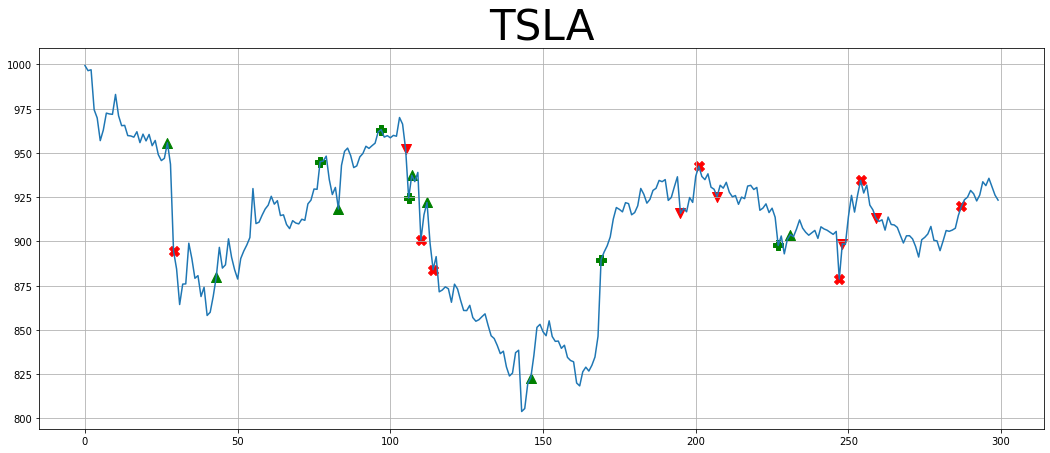

In [ ]:
df['future_returns'] = df['Close'].pct_change().shift(-3)
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['rsi'][i]>=40 and df['rsi'][i]<45.0 and position_Buy!="Buy" and position_Sell!="Sell"   :
        buy.append(df['Close'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['rsi'][i]<=50.0 and df['rsi'][i]>45.0 and position_Sell!="Sell" and position_Buy!="Buy"  :
        sell.append(df['Close'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_rsi#######################################################
    elif position_Buy=="Buy":
        if df['rsi'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['rsi'][i]<=30 :
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_rsi#######################################################
    elif position_Sell=="Sell":
        if df['rsi'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['rsi'][i]>=65:
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['Close'])
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100)
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100)
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100)
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100)
plt.title(symb,size=42)

plt.grid()
plt.show()
df.to_csv('azaz.csv')